# Project Business Statistics: E-news Express

**Marks: 60**

### Business context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:


1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [190]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [191]:
data = pd.read_csv('abtest.csv')

In [192]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Viewing the first and last few rows of the dataset

In [193]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [194]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


* we can see 6 columns : user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred, and total 99 rows

### Checking the shape of the dataset

In [195]:
df.shape

(100, 6)

* there are 100 rows and 6 columns

#### Data types

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* there are 5 columns in the data: 
* group, landing_page, converted and language_preferred  are objects
* time_spent_on_the_page is float 64
* user_id is int, and unique for every user but cannot be considered as int type and should be considered as categorical type, so we need to fix that

In [197]:
df["user_id"]=df["user_id"].astype("category")

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    object  
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 9.9+ KB


#### Getting the statistical summary for the numerical variables

In [199]:
df.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


* The average time_spent_on_the_page  obtained from the sample is 5.37
* The median time_spent_on_the_page (5.41) is almost equal to the average, which suggests that the time might be normally distributed
* Min time_spent_on_the_page is 0.19
* Max 	time_spent_on_the_page is 10.71

#### Getting the statistical summary for the categorical variables!!!

In [200]:
df.describe(include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,treatment,old,yes,French
freq,50,50,54,34


In [201]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.0,100,100,100.000000,100,100
unique,100.0,2,2,NaN,2,3
top,546592.0,treatment,old,NaN,yes,French
freq,1.0,50,50,NaN,54,34
mean,NaN,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,NaN,7.022500,NaN,NaN


In [202]:
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [203]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [204]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [205]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

There are 5 categorical columns(including user ID which we converted, Landing page: has 50 old and 50 new users, 
                                converted: 54converted and 46not, language_preferred: French 34, Spanish 34, English 32, 
                                Group: treatment 50 and control 50)

#### Check for missing values

In [206]:
print(df.isnull().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


* There are 0 missing values in the dataset

#### Check for duplicates 

In [207]:
data.duplicated().sum()

0

* There are 0 duplicates in the dataset

### Univariate Analysis

#### The group observation


In [208]:
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

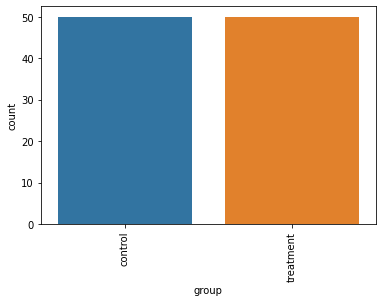

In [209]:
sns.countplot(data=df, x='group')
plt.xticks(rotation=90);

* The data is equal between the first group (control) and the second group (treatment)

### Landing pages

In [210]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

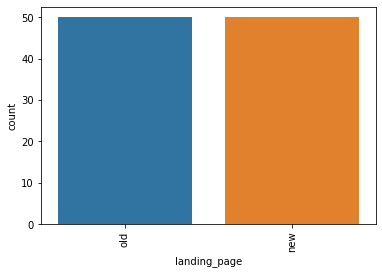

In [211]:
sns.countplot(data=df, x='landing_page')
plt.xticks(rotation=90);

* The data is shows that there are 50 users who visited on old landing page and 50 who visited users the new landing page

### Time_spent_on_the_page

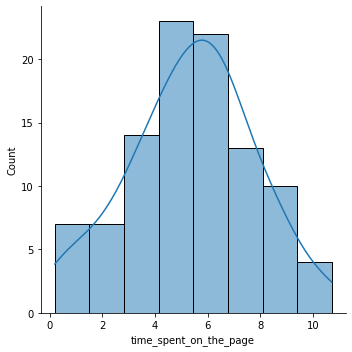

In [212]:
# plot a density curve of the distribution of the scores
sns.displot(df.time_spent_on_the_page,kde=True)
plt.show()

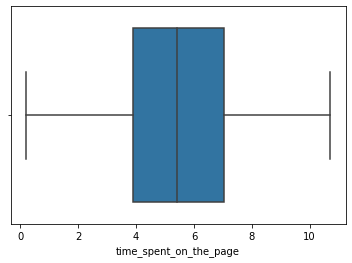

In [213]:
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

* User spent between 3.9 minutes on the page, and 6.9-7minutes, min 0.19, and max 10.7min

### Converted users

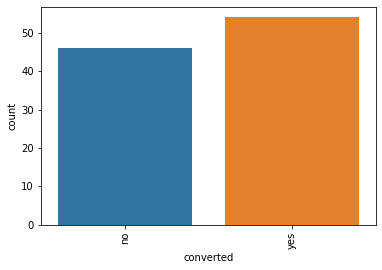

In [214]:
sns.countplot(data=df, x='converted')
plt.xticks(rotation=90);

* Around 54 users were converted to a subscriber of the news portal, and around 46 were not converted

### Language_preferred

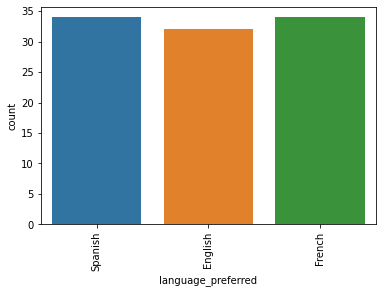

In [215]:
sns.countplot(data=df, x='language_preferred')
plt.xticks(rotation=90);

* There are around 34 users who speaks Spanish, around 32 who speaks English, and around 34 who speaks French

### Observation on user_id

In [216]:
df['user_id'].nunique()

100

* There are 100 unique users

### Bivariate Analysis

### Observation on landing page and time_spent_on_the_page

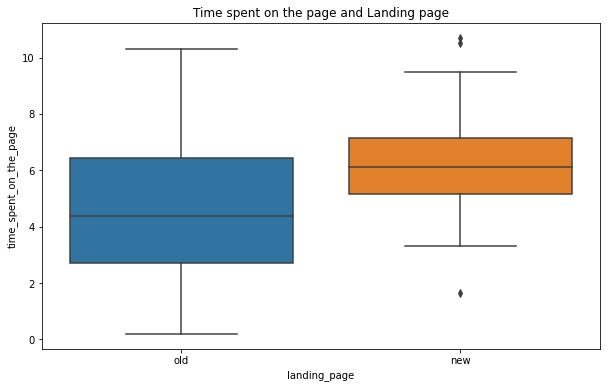

In [217]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.title('Time spent on the page and Landing page')
plt.show()

* We can see on the old landing page users spent in avg 4.3, and on the new page in average 6.3 min

### Conversion status and time_spent_on_the_page

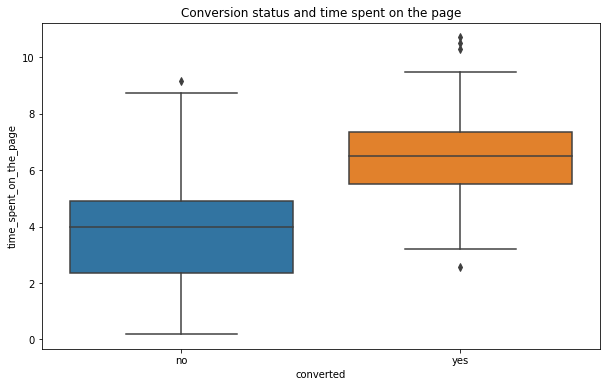

In [218]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.title('Conversion status and time spent on the page')

plt.show()

* Users spent in avg 4.3 min on the old landing page
* and 6.1 min on the new page, so we can see users spent more time on the new landing page compared to the old one.
* we can identify outliers for the new group

### Language preferred and time_spent_on_the_page

<Figure size 720x432 with 0 Axes>

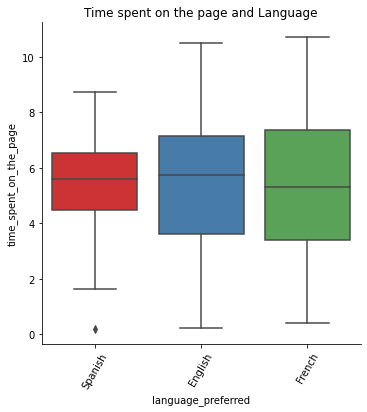

In [219]:
plt.figure(figsize=(10,6))
sns.catplot(x= 'language_preferred', 
            y ='time_spent_on_the_page', 
            data = df, 
            kind = 'box', 
            palette = 'Set1',
           );
plt.xticks(rotation=60);
plt.title('Time spent on the page and Language')
plt.show()

* Users who preferred French spent in avg 5.3 min
* Users who preferred English spent in avg 5.8 min
* Users who preferred Spanish spent in avg 5.6 min
* So we can say that means of these 3 languages are close one to another
* There is one outliers on Spanish samples

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

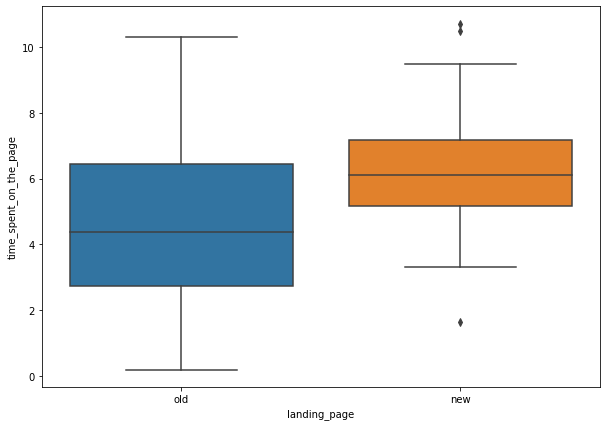

In [220]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x= 'landing_page', y = 'time_spent_on_the_page')
plt.show()

* A slight increase can be observed for the new landing page as compared to the old landing page.
* It can be observed that the median output is higher for the new landing page(6.1min) as compared to the old landing page(4.4min)
* There are outliers in the new landing page with min 2 min and max 10.9min. 

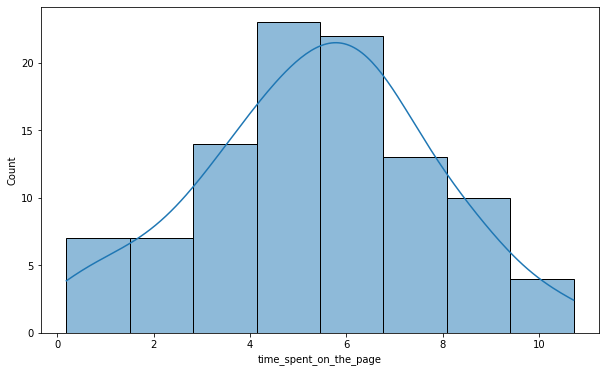

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(df.time_spent_on_the_page, kde=True);
plt.show()

* The time spent on the pages presents a normal distribution and the most common time falls between 5 and 6.8 minutes

### Step 1: Define the null and alternate hypotheses

There are two types of landing pages one is new and anothe is old that is why this is 2 categorical values
The null and alternative hypotheses can be formulated as:

𝐻0:  The mean  from the new landing is equal to that from the old landing page.

𝐻𝑎:  The mean output from the new landing page is greater than that from the old landing page.

Let  𝜇1  and  𝜇2  be the mean output from the new landing page and the mean output from the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:


𝐻0:𝜇1=𝜇2 

𝐻𝑎:𝜇1>𝜇2

### Step 2: Select Appropriate test

* This is a one-tailed test concerning two population means from two independent populations
* The population standard deviations are unknown. Based on this criteria we go for Two samples independent t-test
* As we are taking random samples for two different groups two samples from two independent populations

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [222]:
new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# new_time = df.query('landing_page =="new" ')['time_spent_on_the_page']
# old_time = df.query('landing_page =="old"')['time_spent_on_the_page']

In [223]:
print('The sample standard deviation of the time spent on the new page is:', round(new_time.std(),2))
print('The New page mean is :', str (new_time.mean()))

The sample standard deviation of the time spent on the new page is: 1.82
The New page mean is : 6.2232


In [224]:
print('The sample standard deviation of the time spent on the new page is:', round(old_time.std(),2))
print('The Old page mean is :', str (old_time.mean()))

The sample standard deviation of the time spent on the new page is: 2.58
The Old page mean is : 4.532400000000001


* Sample Standard deviations are different:
    for the new one 1.82
    for the old one 2.58
    therefore this is unequal population standard deviations
* Means are different:
    for the new one 6.22
    for the old one 4.53


### Step 5: Calculate the p-value

In [225]:
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(new_time, old_time, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [226]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the time spent by user on the new landing page is greater than on the old landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

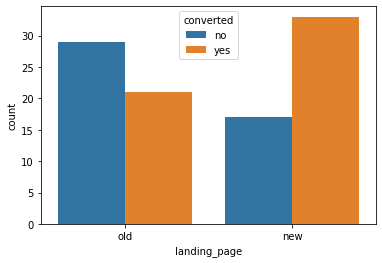

In [227]:
sns.countplot(data=df, x = 'landing_page', hue = 'converted');
plt.show()

* Landing page and converted are two categorical variables
* we need to check if the conversion of the new page is higher than the old one

####  Step1. Define the null and alternate hypotheses

The proportion of converted users on the new landing page is equal to the proportion to the old page:

>𝐻0:p1=p2

The proportion of convertion for the new page is higher than for the old one:

>𝐻𝑎:p1>p2

####  Step 2. Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown this is 2proportion z-test

#### Step 3. Decide the significance level

As given in the problem statement, we select α = 0.05.

####  Step 4. Collect and prepare data

In [228]:
new_conv = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_conv = df[df['group'] == 'control']['converted'].value_counts()['yes']

contr = df.landing_page.value_counts()['old'] 
treat = df.landing_page.value_counts()['new']

print(f'The numbers of users converted on the new and old pages are {new_conv} and {old_conv}')
print(f'The total number of old are {contr} and new users are {treat}')

The numbers of users converted on the new and old pages are 33 and 21
The total number of old are 50 and new users are 50


#### Step 5. Calculate the p-value

In [229]:
from statsmodels.stats.proportion import proportions_ztest   

test_stat, p_value = proportions_ztest([new_conv, old_conv] , [treat, contr], alternative ='larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


#### Step 6. Compare the p-value with $\alpha$

In [230]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#### Step 7. Draw inference

Since the p-value is smaller 0.05 we reject the null hypothesis, we have enough statistical evidence to say that the convertion of the new landing page is higher than convertion for the old landing page

# 3. Is the conversion and preferred language are independent or related?

#### Visual Analysis: Converted vs Language preferred

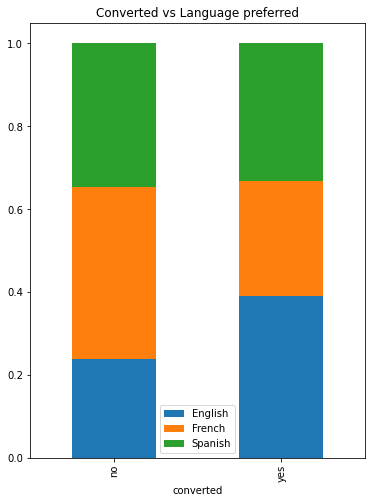

In [231]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.title("Converted vs Language preferred")
plt.legend()
plt.show()

#### Step 1: Define the null and alternate hypotheses

 $H_0$ : The conversion in the new page is independent of the language

$H_a$ : The conversion of the page is dependent on the language

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this information Chi Square test is the right test in this case


### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [232]:
cont_table = pd.crosstab(df['converted'], df['language_preferred'])  

cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [233]:
from scipy.stats import chi2_contingency 

chi2, p_value, dof, exp_freq = chi2_contingency(cont_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Step 6: Compare the p-value with $\alpha$

In [234]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the  conversion of the page is dependent on the language in the new page . We have enough statistical evidence to say that conversion in the new page is independent of the language

# 4. Is the time spent on the new page same for the different language users?

#### Language preferred vs Time spent on the page

In [235]:
df_n = df[df['landing_page'] == 'new']

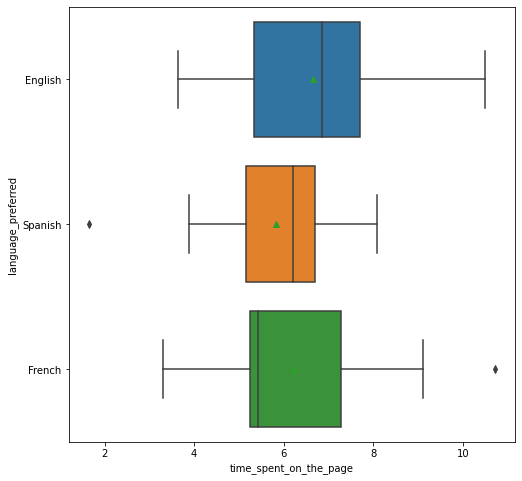

In [236]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()


In [237]:
df_n.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

* We can see that mean of the time for English is 6.66 min, French is 6.19 min, Spanish is 5.8 min

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page for different language users are equal.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least for one language time spent on the page  is different from the rest

This is a problem, concerning three population means. One-way ANOVA is selected


First we need to verify normality and equality of variance:

* Shapiro-Wilks test is applied for testing normality

* Lavene test for equality of variance


#### Shapiro-Wilks test

>$H_0$: The time spent follow a normal distribution

>$H_0$ The time spent does not follow a normal distribution

As given in the problem statement, we select α = 0.05.

In [238]:
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


P-value is 0.5 whis is greater than 0.05 , that is why we fail to reject the null hypothesis, we can say that the variable does not follow a normal distribution

#### Lavene's test

We will test the null hypothesis:

>$H_0$: All population variances are equal 

>$H_0$: At least one variance is different from the rest

As given in the problem statement, we select α = 0.05

In [239]:
statistic, p_value = stats.levene(df[df['language_preferred']=='English']['time_spent_on_the_page'],
                            df[df['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df[df['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.06515086840327314


P-value is 0.5 whis is greater than 0.05 , that is why we fail to reject the null hypothesis, we can say that at least one variance is different from the others

#### Collect and prepare data

In [240]:
English = df[df['language_preferred']=='English']['time_spent_on_the_page']
Spanish = df[df['language_preferred']=='Spanish']['time_spent_on_the_page']
French = df[df['language_preferred']=='French']['time_spent_on_the_page']

#### Find the p-value

In [241]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(English, Spanish, French)
print('The p-value is ', p_value)

The p-value is  0.8665610536012648


#### Compare the p-value with $\alpha$

In [242]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


####  Draw inference

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis, we have enough statistial evidence to say  that there is no difference in the time spent and  preferred languages.

## Conclusion and Business Recommendations

### Conclusions:
* the time spent by user on the new landing page is greater than on the old landing page in average on the New Page users spent 6.22min, and old one 4.52min
* conversion of the new landing page is higher than convertion for the old landing page: The numbers of users converted on the new landing page are 33 and on the old page are 21 out of the total number of old are 50 and new users are 50, which is 
* the conversion in the new page is independent of the language
* there is no difference in the time spent and preferred languages.


### Recommendations:

* Based on the conclusion above the new  design of the landing page of e-news exspress is better compared to the old one, we can see it from the conversion rate: 33 users compared to 21 on the old page, as well as average time on the new landing is higher compared to the old one in order to keep customers engaged long enough to make a decision to subscribe. So I would recommend to keep the new landing page.



___